## Cubic Equations of State (CEOS)

Cubic equations of state were developed to address the limitations of the ideal gas law.
The general form for this class of equation of state is given by:

\begin{equation}
v^{3}+f_{1}(T,P)v^2+f_{2}(T,P)v+f_{3}(T,P) = 0
\end{equation}

where $f_{j}(T,P)$ are specific functions of temperature $T$ and pressure $P$ for each instance of cubic state equation.
Arguably, the best known cubic equation of state is van der Waals (vdW) equation:

\begin{equation}
  \displaystyle P = \frac{RT}{v-b} - \frac{a}{v^2}
\end{equation}

where the parameter $b$ describes the volume occupied by the molecules of the gas, while the parameter $a$ describes how potential energy interactions between molecules influences the pressure. 

### Estimate the (P,v) behavior for CO$_{2}$ using vdW

The critical temperature and pressure for CO$_{2}$ are given by: T$_{\mathrm{cr}}\simeq$ 304.18 K and P$_{\mathrm{cr}}$ = 73.80 bar (source:[NIST](https://webbook.nist.gov/cgi/cbook.cgi?ID=C124389&Mask=4))

In [2]:
# Let's import some Julia packages -
using DataFrames
using CSV
using PyPlot

In [3]:
# Evaluate the vdw model -
# Julia code to solve the vdW for a working fluid
# R given in units of: # L bar mol^{-1} K^{-1}
function calculate_vdW_isotherm(T,v,TCR,PCR; R::Float64 = 8.314e-2)    
    
    # from the critical values, calculate a and b -
    a = (27/64)*((R^2)*TCR^2)/(PCR)
    b = (1/8)*(R*TCR)/(PCR)
    
    # calculate the P -
    P_array = Float64[]
    for v_value in v
        
        # calculate the terms -
        repulsion_term = (R*T)/((v_value) - b)
        attraction_term = a/((v_value))^2   # JV hack ...
    
        # P estimate -
        P = (repulsion_term - attraction_term)
        
        # cache -
        push!(P_array,P)
    end
    
    # return the pressure array -
    return P_array
end

calculate_vdW_isotherm (generic function with 1 method)

In [4]:
# load my NIST data -
CO2_data_table_TCR = CSV.read("./data/CO2-NIST-TCR.txt",delim='\t');
CO2_data_table_294K = CSV.read("./data/CO2-NIST-294K.txt",delim='\t');
CO2_data_table_286K = CSV.read("./data/CO2-NIST-286K.txt",delim='\t');
CO2_data_table_340K = CSV.read("./data/CO2-NIST-340K.txt",delim='\t');
CO2_data_table_SAT = CSV.read("./data/CO2-NIST-SAT.txt",delim='\t');

In [7]:
# Run the vdW simulation of the data -
# get the v_array from the experimental data -
v_array_TCR = CO2_data_table_TCR[:,4]
P_array_TCR = CO2_data_table_TCR[:,2]

# T = 340K
v_array_340K = CO2_data_table_340K[:,4]
P_array_340K = CO2_data_table_340K[:,2]

# T = 294K
v_array_294K = CO2_data_table_294K[:,4]
P_array_294K = CO2_data_table_294K[:,2]

# T = 286K
v_array_286K = CO2_data_table_286K[:,4]
P_array_286K = CO2_data_table_286K[:,2]

# SAT -
P_array_SAT = CO2_data_table_SAT[:,2]
v_array_SAT_l = CO2_data_table_SAT[:,4]
v_array_SAT_v = CO2_data_table_SAT[:,16]

# Lets compute the pressure estimate using vdW -
# Critical point data -
PCR = 73.80 # bar
TCR = 304.10 # K
v_array_vdW = range(0.05,stop = 0.50, length = 100) |> collect

# Look at the critical point -
T = 304.18  # K
P_vdW = calculate_vdW_isotherm(T,v_array_vdW,TCR,PCR);

# Look at the T = 286K -
T = 286.25 # K
P_vdW_286K = calculate_vdW_isotherm(T,v_array_vdW,TCR,PCR);

# Look at the T = 340K -
T = 340.0 # K
P_vdW_340K = calculate_vdW_isotherm(T,v_array_vdW,TCR,PCR);

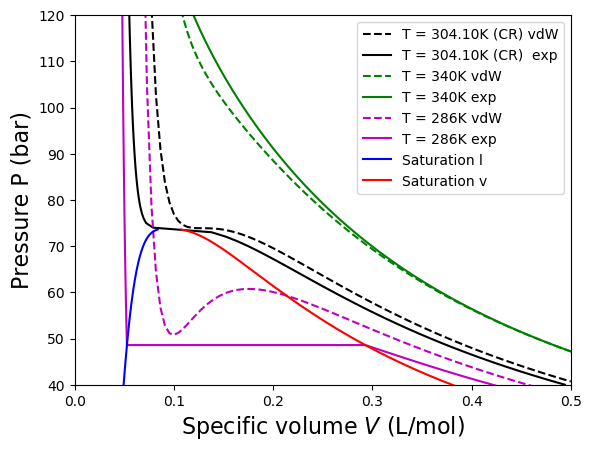

In [8]:
# make a plot of the model versus the data -
clf()
plot(v_array_vdW,P_vdW,"k--",label="T = 304.10K (CR) vdW")
plot(v_array_TCR,P_array_TCR,"k", label="T = 304.10K (CR)  exp")

plot(v_array_vdW,P_vdW_340K,"g--",label="T = 340K vdW")
plot(v_array_340K,P_array_340K,"g", label="T = 340K exp")

plot(v_array_vdW,P_vdW_286K,"m--",label="T = 286K vdW");
plot(v_array_286K,P_array_286K,"m", label="T = 286K exp");

# plot the saturation dome -
plot(v_array_SAT_l,P_array_SAT,"b", label="Saturation l");
plot(v_array_SAT_v,P_array_SAT,"r", label="Saturation v");

# label -
axis([0.0,0.50,40,120]);
xlabel(L"Specific volume $V$ (L/mol)",fontsize=16);
ylabel("Pressure P (bar)",fontsize=16);
legend(loc="upper right");